In [6]:
## In this notebook we compare the results from different machine learning models using monthly training-prediction window

In [2]:
import sys
sys.path.append('/home/jovyan/work/')
sys.path.append('/home/jovyan/work/src')
sys.path.append('/home/jovyan/work/src/data')
sys.path.append('/home/jovyan/work/src/data_explore')
sys.path.append('/home/jovyan/work/src/features')
sys.path.append('/home/jovyan/work/src/models')
sys.path.append('/home/jovyan/work/src/analysis')


In [3]:
print(sys.path)

['/home/jovyan/work/notebooks', '/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis']


In [4]:
from src import data,data_explore,features
from data import create_input_data
from data_explore import explore_util
from features import build_features
from models import train_model,predict_model
from analysis import analyze_pred

In [73]:
import pandas as pd
result_nolookback = pd.read_csv('../data/processed/month_prediction_nolookback_LR_anon_jan22-dec22.csv')
result_lookback35 = pd.read_csv('../data/processed/month_prediction_lookback35_LR_anon_jan-nov22.csv')
result_lookback35_nn = pd. read_csv('../data/processed/month_prediction_lookback35_nn_anon_jan-nov22_prov45.csv')
result_nolookback_nn = pd.read_csv('../data/processed/month_prediction_nolookback_nn_anon_jan-nov22_prov45.csv')

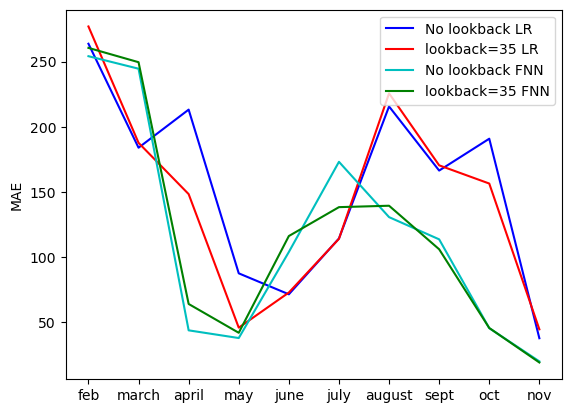

In [76]:
import matplotlib.pyplot as plt
mae_lookback35 = [] 
mae_nolookback = []
mae_nolookback_nn = []
mae_lookback35_nn = []


for i in range(0,10):
    mae_nolookback.append(result_nolookback.at[i,'mae'])
    mae_lookback35.append(result_lookback35.at[i,'mae'])
    mae_lookback35_nn.append(result_lookback35_nn.at[i,'mae'])
    mae_nolookback_nn.append(result_nolookback_nn.at[i,'mae'])
line1, = plt.plot(predict_months,mae_nolookback,'b')
line2, = plt.plot(predict_months,mae_lookback35,'r')
line3, = plt.plot(predict_months,mae_nolookback_nn,'c')
line4, = plt.plot(predict_months,mae_lookback35_nn,'g')

line1.set_label('No lookback LR')
line2.set_label('lookback=35 LR')
line3.set_label('No lookback FNN')
line4.set_label('lookback=35 FNN')
plt.ylabel('MAE')
plt.legend()

Text(0, 0.5, 'MSE')

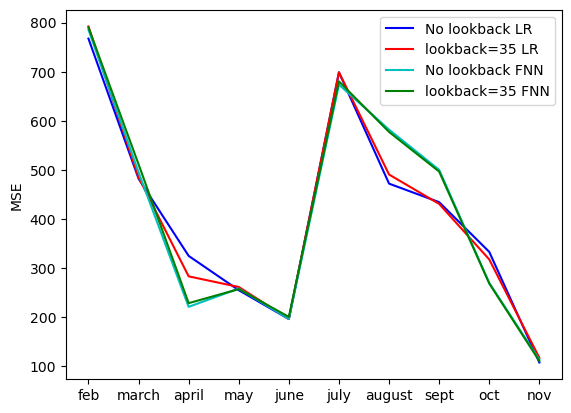

In [83]:
mse_lookback35 = [] 
mse_nolookback = []
mse_nolookback_nn = []
mse_lookback35_nn = []

for i in range(0,10):
    mse_nolookback.append(result_nolookback.at[i,'mse'])
    mse_lookback35.append(result_lookback35.at[i,'mse'])
    mse_lookback35_nn.append(result_lookback35_nn.at[i,'mse'])
    mse_nolookback_nn.append(result_nolookback_nn.at[i,'mse'])
line1, = plt.plot(predict_months,mse_nolookback,'b')
line2, =plt.plot(predict_months,mse_lookback35,'r')
line3, = plt.plot(predict_months,mse_nolookback_nn,'c')
line4, = plt.plot(predict_months,mse_lookback35_nn,'g')
line1.set_label('No lookback LR')
line2.set_label('lookback=35 LR')
line3.set_label('No lookback FNN')
line4.set_label('lookback=35 FNN')
plt.legend()
plt.ylabel('MSE')

Text(0, 0.5, 'r2score')

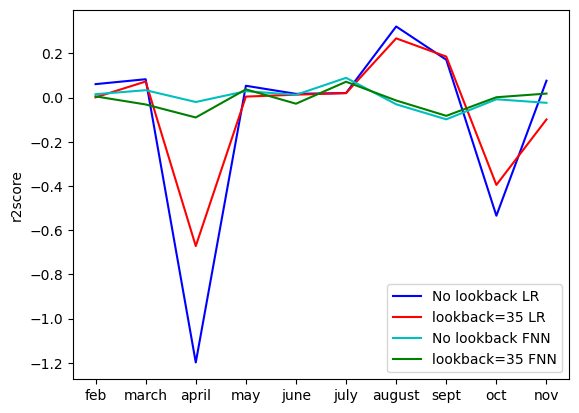

In [84]:
r2_lookback35 = [] 
r2_nolookback = []
r2_nolookback_nn = []
r2_lookback35_nn = []

for i in range(0,10):
    r2_nolookback.append(result_nolookback.at[i,'r2s'])
    r2_lookback35.append(result_lookback35.at[i,'r2s'])
    r2_lookback35_nn.append(result_lookback35_nn.at[i,'r2s'])
    r2_nolookback_nn.append(result_nolookback_nn.at[i,'r2s'])
line1, = plt.plot(predict_months,r2_nolookback,'b')
line2, = plt.plot(predict_months,r2_lookback35,'r')
line3, = plt.plot(predict_months,r2_nolookback_nn,'c')
line4, = plt.plot(predict_months,r2_lookback35_nn,'g')
line1.set_label('No lookback LR')
line2.set_label('lookback=35 LR')
line3.set_label('No lookback FNN')
line4.set_label('lookback=35 FNN')
plt.legend()
plt.ylabel('r2score')

Text(0, 0.5, 'Total Number of Wrong Scheduled Jobs')

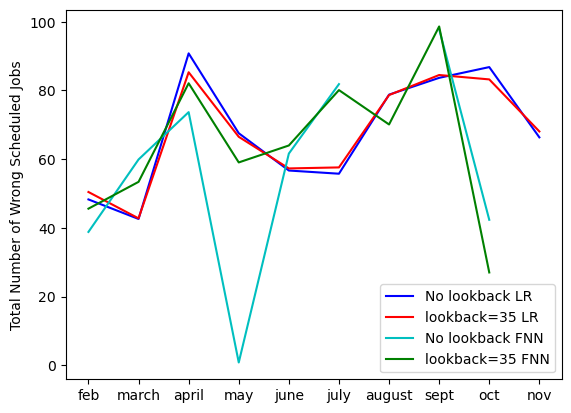

In [82]:
t_wrong_sched_nolookback= [] 
t_wrong_sched_lookback35= [] 
t_wrong_sched_nolookback_nn = []
t_wrong_sched_lookback35_nn = []


for i in range(0,10):
    t_wrong_sched_nolookback.append(result_nolookback.at[i,'t_wrong_sched_%']) 
    t_wrong_sched_lookback35.append(result_lookback35.at[i,'t_wrong_sched_%']) 
    t_wrong_sched_nolookback_nn.append(result_nolookback_nn.at[i,'t_wrong_sched_%']) 
    t_wrong_sched_lookback35_nn.append(result_lookback35_nn.at[i,'t_wrong_sched_%']) 
    
line1, = plt.plot(predict_months,t_wrong_sched_nolookback,'b')
line2, = plt.plot(predict_months,t_wrong_sched_lookback35,'r')
line3, = plt.plot(predict_months,t_wrong_sched_nolookback_nn,'c')
line4, = plt.plot(predict_months,t_wrong_sched_lookback35_nn,'g')

line1.set_label('No lookback LR')
line2.set_label('lookback=35 LR')
line3.set_label('No lookback FNN')
line4.set_label('lookback=35 FNN')
plt.legend()
plt.ylabel('Total Number of Wrong Scheduled Jobs')